In [2]:
library("AER")
#https://cran.r-project.org/web/packages/AER/AER.pdf
#install.packages("AER")

#install.packages("AER", repos = "http://crans.rstudio.com")

## data for non-oil-producing countries
data("GrowthDJ")
dj <- subset(GrowthDJ, oil == "no")
## Different scalings have been used by different authors,
## different types of standard errors, etc.,
## see Koenker & Zeileis (2009) for an overview
## Durlauf & Johnson (1995), Table II
mrw_model <- I(log(gdp85) - log(gdp60)) ~ log(gdp60) +
log(invest/100) + log(popgrowth/100 + 0.05) + log(school/100)


dj_mrw <- lm(mrw_model, data = dj)
coeftest(dj_mrw)




t test of coefficients:

                           Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                3.021522   0.827476  3.6515 0.0004307 ***
log(gdp60)                -0.288374   0.061582 -4.6828 9.622e-06 ***
log(invest/100)            0.523737   0.086865  6.0293 3.297e-08 ***
log(popgrowth/100 + 0.05) -0.505657   0.288608 -1.7521 0.0830613 .  
log(school/100)            0.231117   0.059461  3.8868 0.0001903 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [3]:
linearHypothesis(dj_mrw, "log(invest/100)+log(popgrowth/100 + 0.05)=1", white.adjust="hc0")



Res.Df,Df,F,Pr(>F)
94,NA,NA,NA
93,1,11.38067,0.001083367


In [4]:
anova(dj_mrw)



,Df,Sum Sq,Mean Sq,F value,Pr(>F)
log(gdp60),1,0.7010494,0.7010494,6.555458,1.206729e-02
log(invest/100),1,6.9452261,6.9452261,64.944266,2.553987e-12
log(popgrowth/100 + 0.05),1,0.1213505,0.1213505,1.134739,2.895246e-01
log(school/100),1,1.6156269,1.6156269,15.107601,1.902567e-04
Residuals,93,9.9455435,0.1069413,NA,NA


In [5]:
Anova(dj_mrw)

,Sum Sq,Df,F value,Pr(>F)
log(gdp60),2.3450284,1,21.928177,9.621502e-06
log(invest/100),3.8875878,1,36.352529,3.296583e-08
log(popgrowth/100 + 0.05),0.3282759,1,3.069683,8.306126e-02
log(school/100),1.6156269,1,15.107601,1.902567e-04
Residuals,9.9455435,93,NA,NA


In [6]:
library(foreign)
mrwdata <- read.dta("https://github.com/davidrpugh/econometrics-labs/raw/master/lab-6/mrw1992.dta")
head(mrwdata)


c_index,c_name,c_code,cont,nonoil,inter,oecd,gdp60,gdp85,popgrowth,igdp,school
1,Algeria,DZA,Africa,Non-oil,Intermediate Sample,Non-OECD,2485,4371,2.6,24.1,4.5
2,Angola,AGO,Africa,Non-oil,Not intermediate sample,Non-OECD,1588,1171,2.1,5.8,1.8
3,Benin,BEN,Africa,Non-oil,Not intermediate sample,Non-OECD,1116,1071,2.4,10.8,1.8
4,Botswana,BWA,Africa,Non-oil,Intermediate Sample,Non-OECD,959,3671,3.2,28.3,2.9
5,Burkina Faso,BFA,Africa,Non-oil,Not intermediate sample,Non-OECD,529,857,0.9,12.7,0.4
6,Burundi,BDI,Africa,Non-oil,Not intermediate sample,Non-OECD,755,663,1.7,5.1,0.4


In [7]:
mrwdata$invest=mrwdata$igdp 

mrwdata$workpop=mrwdata$popgrowth

mrw_model_1 <- I(log(gdp85) - log(gdp60)) ~ log(gdp60) +
  log(invest/100) + log(workpop/100 + 0.05) + log(school/100)

mrw_lm <- lm(mrw_model_1, data = mrwdata)
coeftest(mrw_lm) # nedd library(AER)



t test of coefficients:

                         Estimate Std. Error t value  Pr(>|t|)    
(Intercept)              3.112868   0.850441  3.6603 0.0004063 ***
log(gdp60)              -0.297321   0.049973 -5.9496 4.073e-08 ***
log(invest/100)          0.552855   0.087700  6.3039 8.118e-09 ***
log(workpop/100 + 0.05) -0.506675   0.252321 -2.0081 0.0473613 *  
log(school/100)          0.216450   0.059284  3.6511 0.0004194 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [8]:

linearHypothesis(mrw_lm, "log(invest/100)+log(workpop/100 + 0.05)=1")



Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
100,12.63033,NA,NA,NA,NA
99,11.36411,1,1.266219,11.03084,0.001255913


In [9]:
anova(mrw_lm)



,Df,Sum Sq,Mean Sq,F value,Pr(>F)
log(gdp60),1,7.067357e-06,7.067357e-06,6.156825e-05,9.937552e-01
log(invest/100),1,1.022777e+01,1.022777e+01,8.910064e+01,1.829148e-15
log(workpop/100 + 0.05),1,3.552708e-01,3.552708e-01,3.094990e+00,8.162307e-02
log(school/100),1,1.530185e+00,1.530185e+00,1.333042e+01,4.193765e-04
Residuals,99,1.136411e+01,1.147890e-01,NA,NA


In [10]:
Anova(mrw_lm)

,Sum Sq,Df,F value,Pr(>F)
log(gdp60),4.0632746,1,35.397772,4.073478e-08
log(invest/100),4.5616507,1,39.739444,8.117600e-09
log(workpop/100 + 0.05),0.4628644,1,4.032306,4.736129e-02
log(school/100),1.5301854,1,13.330420,4.193765e-04
Residuals,11.3641102,99,NA,NA


In [12]:
dj_model <- I(log(gdp85) - log(gdp60)) ~ log(gdp60) +
log(invest) + log(popgrowth/100 + 0.05) + log(school)

dj_sub1 <- lm(dj_model, data = dj, subset = gdp60 < 1800 & literacy60 < 50)

coeftest(dj_sub1, vcov = sandwich)








t test of coefficients:

                           Estimate Std. Error t value Pr(>|t|)   
(Intercept)                1.400107   1.846022  0.7584  0.45299   
log(gdp60)                -0.443763   0.156607 -2.8336  0.00741 **
log(invest)                0.309743   0.114112  2.7144  0.01003 * 
log(popgrowth/100 + 0.05) -0.379416   0.467647 -0.8113  0.42236   
log(school)                0.208786   0.094095  2.2189  0.03271 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [13]:
dj_sub2 <- lm(dj_model, data = dj, subset = gdp60 >= 1800 & literacy60 >= 50)
coeftest(dj_sub2, vcov = sandwich)


t test of coefficients:

                           Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                0.449696   0.723126  0.6219  0.537835    
log(gdp60)                -0.434975   0.084607 -5.1411 9.114e-06 ***
log(invest)                0.688518   0.170416  4.0402  0.000259 ***
log(popgrowth/100 + 0.05) -0.545354   0.283213 -1.9256  0.061867 .  
log(school)                0.114271   0.163733  0.6979  0.489595    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [14]:
# http://scholar.harvard.edu/files/msen/files/sen_gov2000_section9.txt?m=1360043942
## section 9 - multiple testing (f-test)
## gov 2k
## nov 12, 2009
## section notes prepared by msen


#################################
## 1) Working with lm() output ##
#################################

## There is a lot packed into output from the lm function.
## It is often fruitful to write functions that use lm output
## to do some task that we need.

## Let's load the
## Duncan data from the car library for a running example.
## This dataset looks at the prestige of jobs based on their
## income and education levels.

In [15]:
library(car)
data(Duncan)

my.mod <- lm(prestige ~ education + income, data=Duncan)
names(my.mod)
names(summary(my.mod))

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

In [16]:
## there are a number of useful functions that extract what we
## want from the lm output.

## The beta hats:
coef(my.mod) 


(Intercept)   education      income 
 -6.0646629   0.5458339   0.5987328

In [17]:
## The variance-covariance matrix of the beta-hats:
vcov(my.mod)

,(Intercept),education,income
(Intercept),18.249481,-0.150706025,-0.151845008
education,-0.150706,0.009653582,-0.008518551
income,-0.151845,-0.008518551,0.014320275


In [18]:
## The model matrix [1,X]:
head(model.matrix(my.mod))

,(Intercept),education,income
accountant,1,86,62
pilot,1,76,72
architect,1,92,75
author,1,90,55
chemist,1,86,64
minister,1,84,21


In [19]:
## so you can see everything
model.matrix(my.mod)
Duncan

,(Intercept),education,income
accountant,1,86,62
pilot,1,76,72
architect,1,92,75
author,1,90,55
chemist,1,86,64
minister,1,84,21
professor,1,93,64
dentist,1,100,80
reporter,1,87,67
engineer,1,86,72


,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90
minister,prof,21,84,87
professor,prof,64,93,93
dentist,prof,80,100,90
reporter,wc,67,87,52
engineer,prof,72,86,88


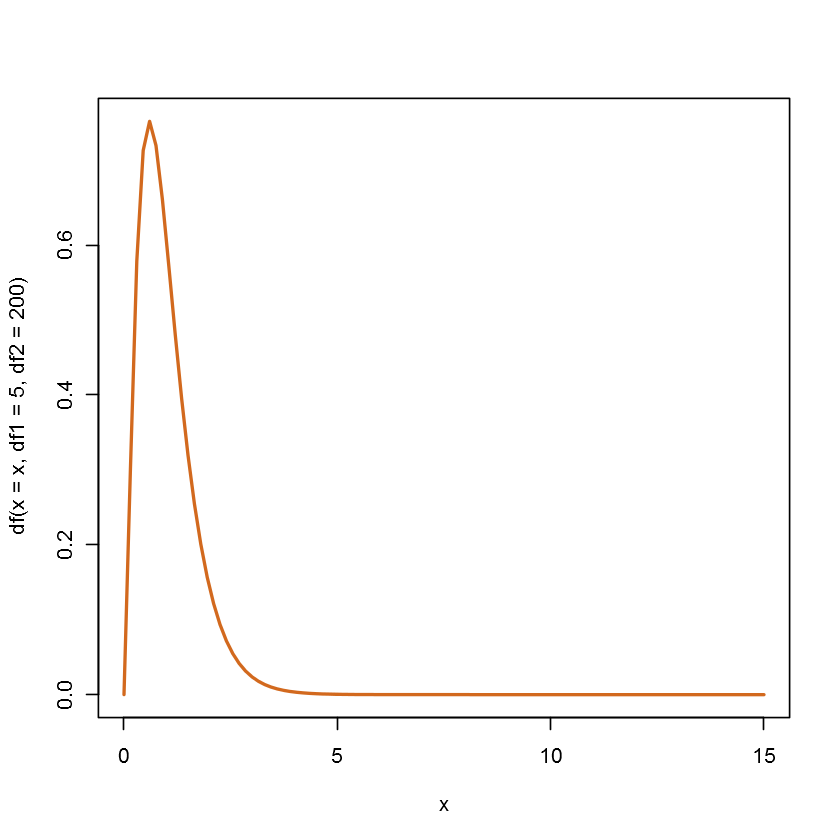

In [20]:
#######################
## 2) F distribution ##
#######################

## Let's start off with a quick demonstration of what the F
## distribution looks like for some parameters:

curve(df(x=x,df1=5,df2=200), from=0, to=15, col="chocolate", lwd=2)



In [21]:
## We can use the same pXXXX functions from the normal and t
## with the F:

pf(q=2, df1=5, df2=200)
pf(q=2, df1=5, df2=200, lower.tail=FALSE)

[1] 0.9198234

[1] 0.08017664

In [22]:
	## if lower.tail = T, probabilities are P[X <= x], otherwise, P[X > x]

## We can also use the qXXXX functions to find the point where
## x% of the distribution is higher or lower:

qf(p=0.95, df1=5, df2=200)
## or
qf(p=0.05,  df1=5, df2=200, lower.tail=FALSE)

[1] 2.259237

[1] 2.259237

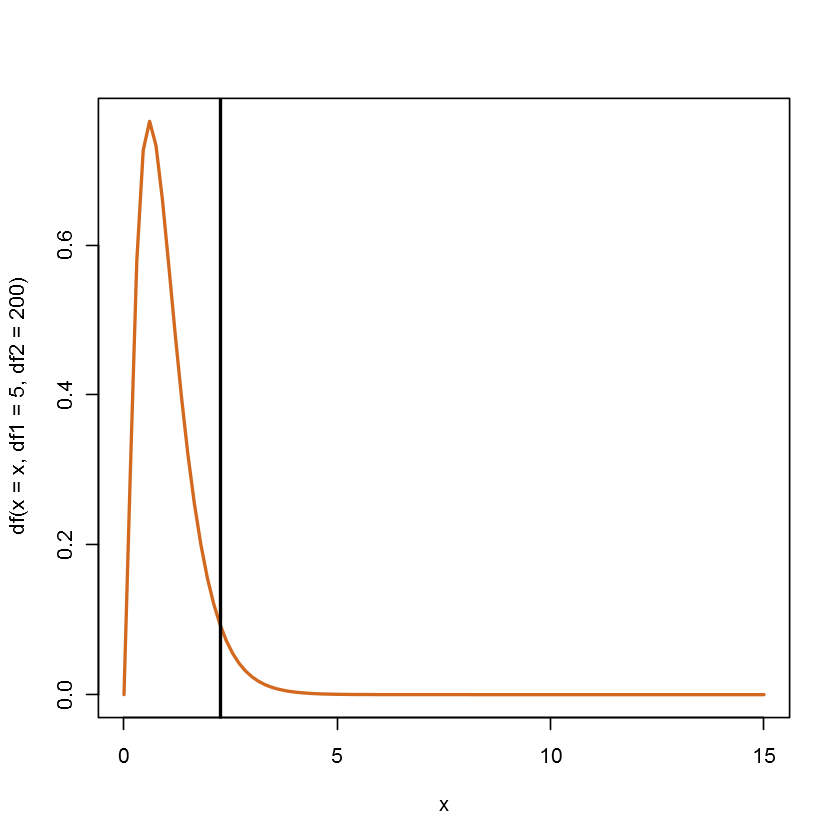

In [23]:
curve(df(x=x,df1=5,df2=200), from=0, to=15, col="chocolate", lwd=2)
abline(v=qf(p=0.95, df1=5, df2=200), lwd=2)


In [24]:
## We can do F-tests in R a few different ways.

#######################
## 2) F Omnibus test ##
#######################

## A special case of the F-test that is often used is the "omnibus" test
## of all of the variables in the regression. R (and most other
## software packages) gives you this in the regression output:

lm.out <- lm(prestige ~ education + income, data=Duncan)
summary(lm.out)


Call:
lm(formula = prestige ~ education + income, data = Duncan)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.538  -6.417   0.655   6.605  34.641 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.06466    4.27194  -1.420    0.163    
education    0.54583    0.09825   5.555 1.73e-06 ***
income       0.59873    0.11967   5.003 1.05e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.37 on 42 degrees of freedom
Multiple R-squared:  0.8282,	Adjusted R-squared:   0.82 
F-statistic: 101.2 on 2 and 42 DF,  p-value: < 2.2e-16


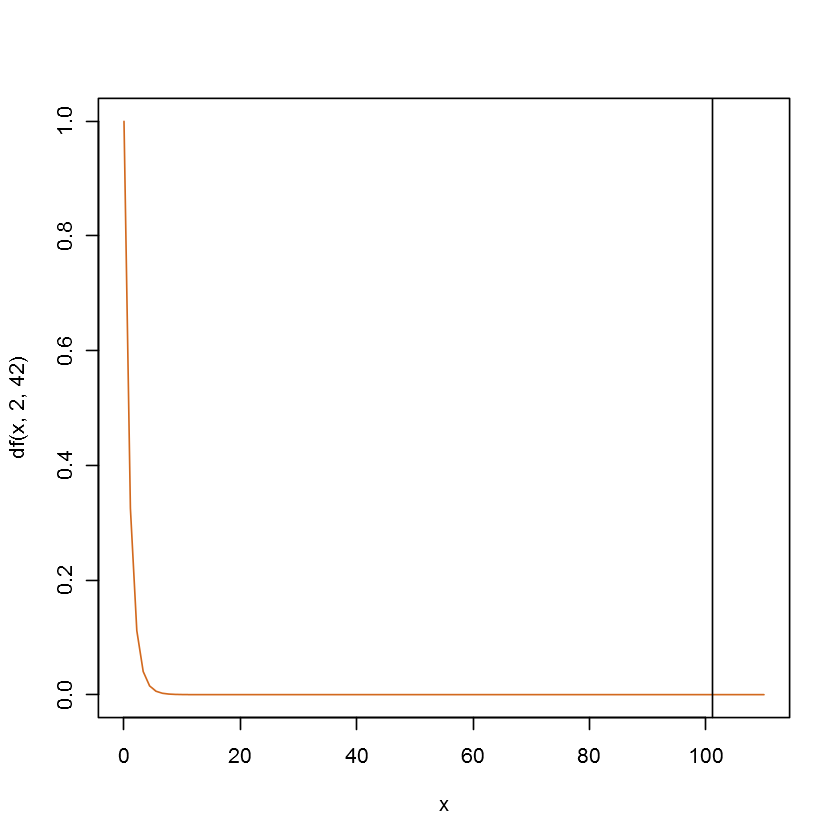

In [25]:
## We can plot this test-statistic against its null distribution
## and we can see that it is very unlikely.

curve(df(x, 2, 42), from=0, to=110, col="chocolate")
abline(v=summary(lm.out)$fstatistic[1])

In [26]:
	## extracting the omnibus f stat from the lm output

## note that df1 = 2 (two restrictions)
## and df2 = n-(k+1) -- > 45 - 2 - 1

## We can also calculate the F-statistic "manually."
## We know from lecture that 

# F test stat = (RSSnull - RSSfull)/q _divided_ by RSSfull/n-(k+1)

lm.null <- lm(prestige ~ 1, data = Duncan)
	## note that this is basically taking the mean of x
lm.full <- lm(prestige ~ education + income, data = Duncan)
	## and this is the fullmodel

In [27]:
RSSnull <- sum(lm.null$residuals^2)
RSSfull <- sum(lm.full$residuals^2)

df1 <- length(lm.full$coef) - 1
df2 <- nrow(model.matrix(lm.full)) - (length(lm.full$coef) -1 + 1)

((RSSnull - RSSfull)/df1)/(RSSfull/df2)
summary(lm.full)$fstatistic[1]

## Ta da!

[1] 101.2162

value 
101.2162

In [28]:
#########################################
## 2) F General Linear Hypothesis Test ##
#########################################

## general linear hypothesis tests are more complicated.
## You'll be writing a function that does this in your pset.

## let's take a break to discuss

## One function that will help is 
## linear.hypothesis() in the car library

## linear.hypothesis() permits a broad set of restrictions.  
## hint: you can


lm.out <- lm(prestige ~ income + education, data=Duncan)
linearHypothesis(lm.out, matrix(c(0,1,0,0,0,1),2,3, byrow=T), rhs=c(0,0))
summary(lm.out)

## rhs=c(0,0) is our c vector.  
## The matrix() input is a our hypothesis
## matrix.

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
44,43687.644,NA,NA,NA,NA
42,7506.699,2,36180.95,101.2162,8.647636e-17



Call:
lm(formula = prestige ~ income + education, data = Duncan)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.538  -6.417   0.655   6.605  34.641 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.06466    4.27194  -1.420    0.163    
income       0.59873    0.11967   5.003 1.05e-05 ***
education    0.54583    0.09825   5.555 1.73e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.37 on 42 degrees of freedom
Multiple R-squared:  0.8282,	Adjusted R-squared:   0.82 
F-statistic: 101.2 on 2 and 42 DF,  p-value: < 2.2e-16


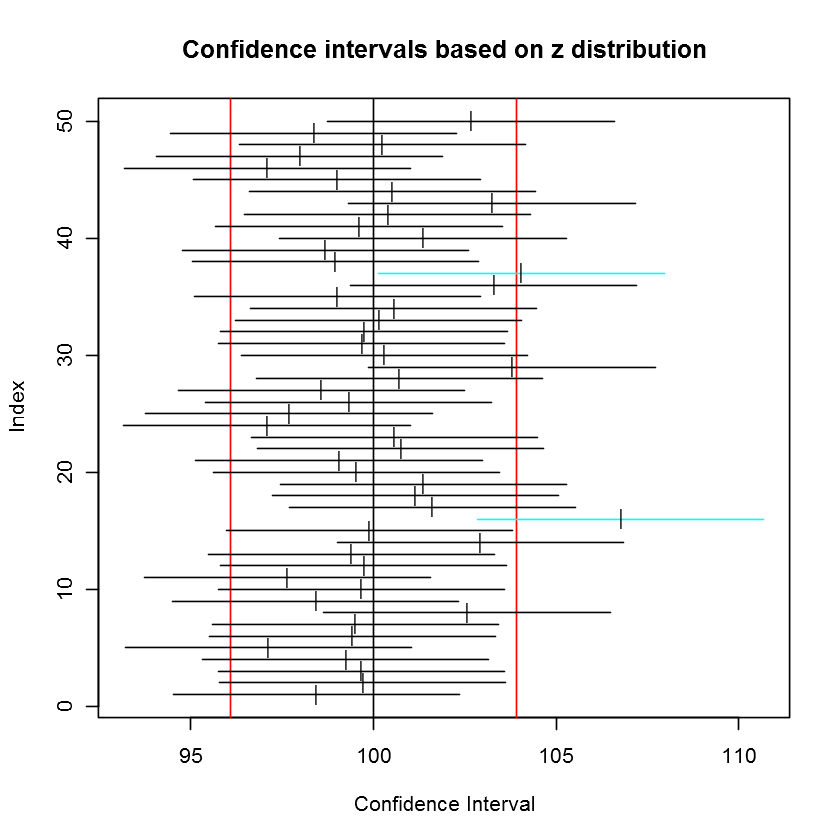

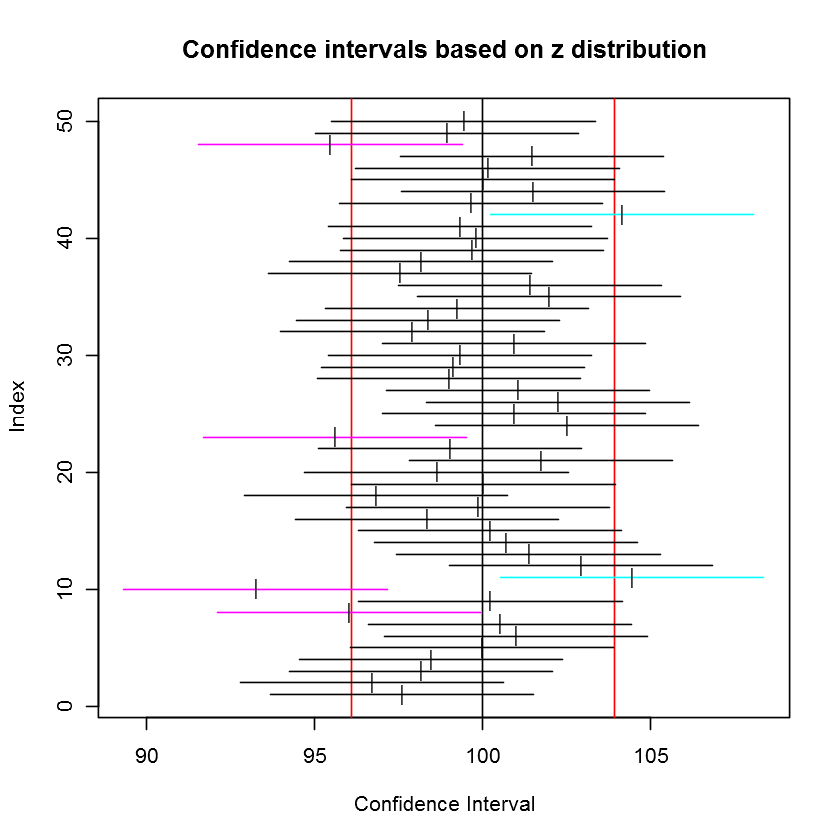

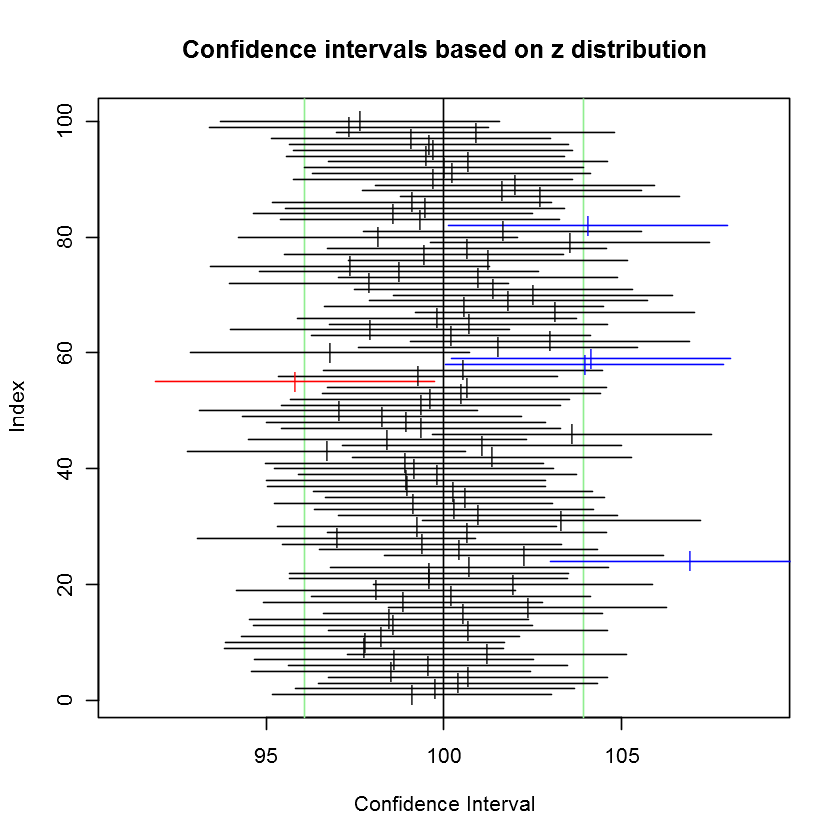

In [29]:
library(TeachingDemos)

ci.examp()
conf.level = 0.95
seed = 100
ci.examp(mean.sim = 100, sd = 10, n = 25, reps = 50, conf.level = 0.95,
         method = "z", lower.conf = (1 - conf.level)/2,
         upper.conf = 1 - (1 - conf.level)/2)
run.ci.examp(reps = 100, seed, method="z", n=25)


Attaching package: 'ellipse'

The following object is masked from 'package:car':

    ellipse



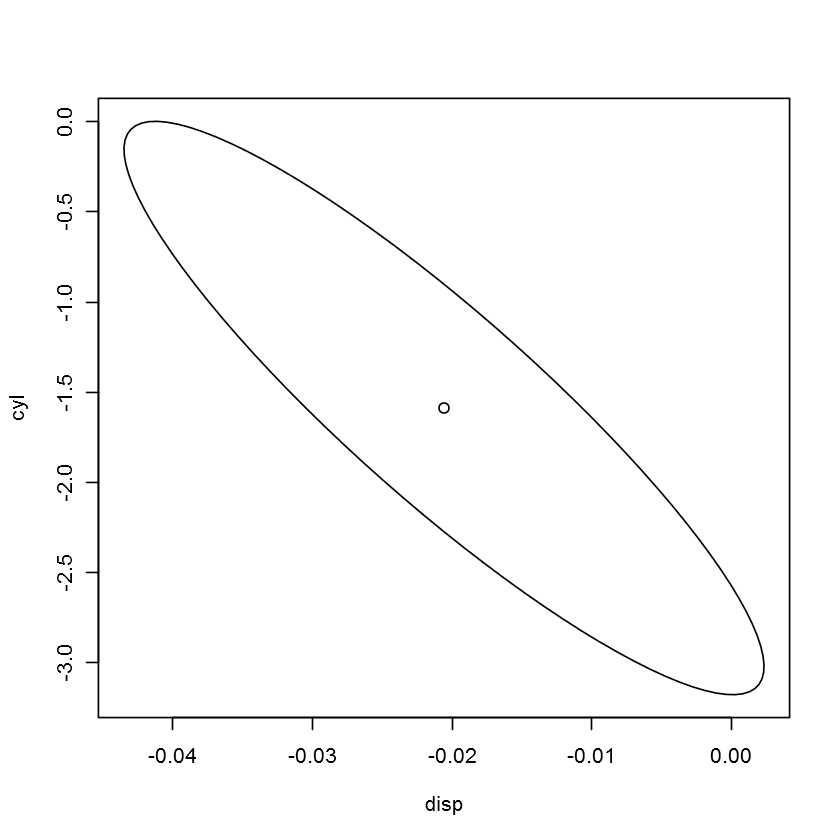

In [30]:
# Plot the estimate and joint 90% confidence region for the displacement and cylinder
# count linear coefficients in the mtcars dataset
library(ellipse)
data(mtcars)
fit <- lm(mpg ~ disp + cyl , mtcars)
plot(ellipse(fit, which = c('disp', 'cyl'), level = 0.90), type = 'l')
points(fit$coefficients['disp'], fit$coefficients['cyl'])


ERROR: Error in ellipse(coef, shape, radius, add = add.plot, xlab = xlab, ylab = ylab, : center must be a vector of length 2


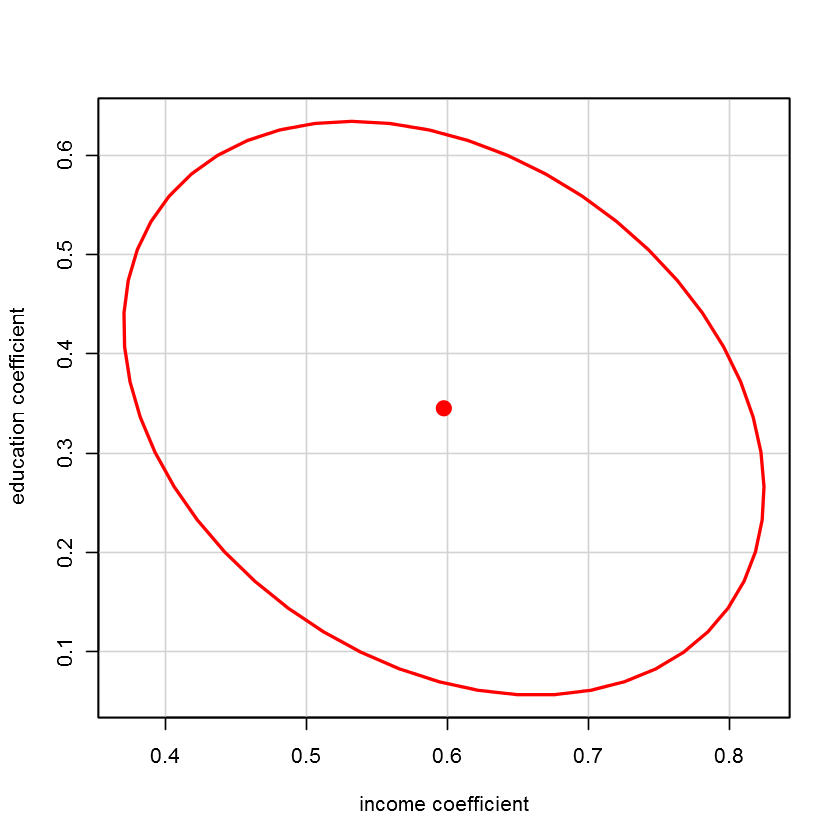

In [31]:
############################
## 3) Confidence Ellipses ##
############################

## confidence.ellipses are hard to compute on your own and are impossible
## with more than two coefficients, but they can be useful. in the car
## library there is a function called, unsurprisingly, confidence.ellipse():

lm.out <- lm(prestige ~ income + education + type, data=Duncan)
confidenceEllipse(lm.out, which.coef=c("income","education"), col="red")
confidenceEllipse(lm.out, which.coef=c("education"), col="red")


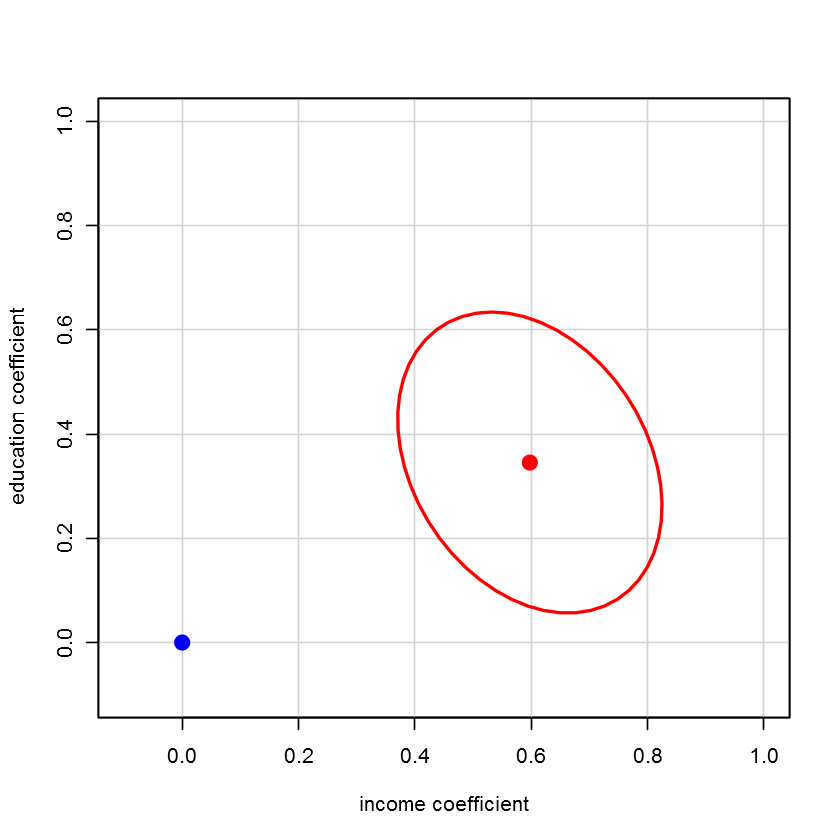

In [33]:
## however, we often cannot see (0,0),
## which is an important point:

confidenceEllipse(lm.out, which.coef=c("income","education"), col="red",
                    xlim=c(-.1,1), ylim=c(-.1,1))

## we can add an additional point on the graph using the points() function

points(x=0, y=0, col="blue", pch=19, cex=1.5)

In [34]:
## we also might want to add lines for the confidence intervals for each
## of the two coefficients. when you do this, make sure you are plotting
## them in the right direction. in this case the CI for income should be
## vertical and the CI for education should be horizontal.



In [ ]:
# http://www.stat.berkeley.edu/~troxler/Testing.Notes.pdf




In [35]:
## ---------------------- ##
## R Tutorial on Testing  ##
## Linear Hypotheses      ##
##                        ##
## Author: Tony Cookson   ##
## ---------------------- ##
## --------------------------- ##
## This tutorial will use      ##
## the "car" library, which is ##
## not preinstalled in R       ##
##                             ##
## This first set of code will ##
## install "car" on your       ##
## computer.                   ##
## --------------------------- ##
# install.packages("car", dependencies = T)
## -------------------------------------------- ##
## Notes:                                       ##
## 1. You will have to pick one of the servers  ##
##    to download "car." It doesn't matter      ##
##    which one you pick.                       ##
## 2. This command will install a bunch of      ##
##    "helper" packages, so R will look like it ##
##    is working for a while.  This is normal.  ##
## -------------------------------------------- ##
## ---------------------- ##
## Start here if you have ##
## "car" on your computer ##
## already.               ##
## ---------------------- ##
library(car)      ## Loads the "car" library
## ---------------------- ##
## Read and Explore Data  ##
## ---------------------- ##
 
library(foreign)                           ## To read Stata Files

edudat.df = read.dta("http://dl.dropbox.com/u/36165717/Teaching/Econ253/edudat2.dta") ##Reads data
 ## Reads Data
summary(edudat.df)

      wage             educ           exper          pareduc         gender    
 Min.   :  1.58   Min.   : 9.00   Min.   : 0.00   Min.   : 6.00   FEMALE:2500  
 1st Qu.:  7.92   1st Qu.:11.00   1st Qu.: 3.00   1st Qu.: 9.00   MALE  :4000  
 Median : 12.31   Median :13.00   Median : 7.00   Median :11.00                
 Mean   : 19.33   Mean   :12.54   Mean   :10.02   Mean   :10.53                
 3rd Qu.: 20.69   3rd Qu.:14.00   3rd Qu.:14.00   3rd Qu.:12.00                
 Max.   :215.00   Max.   :16.00   Max.   :89.00   Max.   :16.00                

In [36]:
## ------------------- ##
## Estimate Regression ##
## ------------------- ##
wage.lm = lm(log(wage)~educ+exper+pareduc+gender,data=edudat.df)
summary(wage.lm)


Call:
lm(formula = log(wage) ~ educ + exper + pareduc + gender, data = edudat.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.00268 -0.35891  0.00052  0.35163  1.79939 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.9320035  0.0415707  22.420  < 2e-16 ***
educ        0.0635518  0.0084035   7.563 4.50e-14 ***
exper       0.0532125  0.0006566  81.047  < 2e-16 ***
pareduc     0.0263129  0.0096364   2.731  0.00634 ** 
genderMALE  0.0931139  0.0134007   6.948 4.05e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5256 on 6495 degrees of freedom
Multiple R-squared:  0.5332,	Adjusted R-squared:  0.5329 
F-statistic:  1855 on 4 and 6495 DF,  p-value: < 2.2e-16


In [37]:
## ------------------------------------ ##
## Test beta_educ + beta_exper = 0.10   ##
## ------------------------------------ ##
linearHypothesis(wage.lm, "educ+exper=0.1")

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
6496,1795.153,NA,NA,NA,NA
6495,1794.060,1,1.092572,3.955417,0.04676263


In [38]:
## ------------------------------------ ##
## Test beta_educ + beta_exper = 0.10   ##
## AND  beta_genderMALE = 0.05          ##
## AND  beta_pareduc + beta_educ = 0    ##
## ------------------------------------ ##
linearHypothesis(wage.lm, c("educ+exper=0.1","genderMALE=0.05","pareduc+educ=0"))


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
6498,1971.921,NA,NA,NA,NA
6495,1794.060,3,177.8614,214.636,9.292436e-133


In [39]:
##https://sites.google.com/site/dataforhonorseconometrics/
#install.packages("car", dependencies=T)
library(car) ## loads the "car" package

#install.packages("foreign", dependencies=T)
library(foreign) #To read Stata files
edudata.df = read.dta("http://dl.dropbox.com/u/36165717/Teaching/Econ253/edudat2.dta") ##Reads data

summary(edudata.df)

      wage             educ           exper          pareduc         gender    
 Min.   :  1.58   Min.   : 9.00   Min.   : 0.00   Min.   : 6.00   FEMALE:2500  
 1st Qu.:  7.92   1st Qu.:11.00   1st Qu.: 3.00   1st Qu.: 9.00   MALE  :4000  
 Median : 12.31   Median :13.00   Median : 7.00   Median :11.00                
 Mean   : 19.33   Mean   :12.54   Mean   :10.02   Mean   :10.53                
 3rd Qu.: 20.69   3rd Qu.:14.00   3rd Qu.:14.00   3rd Qu.:12.00                
 Max.   :215.00   Max.   :16.00   Max.   :89.00   Max.   :16.00                

In [40]:


wage.lm = lm( log(wage) ~ educ + exper + pareduc + gender, data=edudata.df)
summary(wage.lm)

linearHypothesis(wage.lm, "educ+exper=0.1", test="Chisq")
##character string, "F" or "Chisq", specifying whether to compute the 
##finite-sample F statistic (with approximate F distribution) or the 
##large-sample Chi-squared statistic (with asymptotic Chi-squared distribution)



Call:
lm(formula = log(wage) ~ educ + exper + pareduc + gender, data = edudata.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.00268 -0.35891  0.00052  0.35163  1.79939 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.9320035  0.0415707  22.420  < 2e-16 ***
educ        0.0635518  0.0084035   7.563 4.50e-14 ***
exper       0.0532125  0.0006566  81.047  < 2e-16 ***
pareduc     0.0263129  0.0096364   2.731  0.00634 ** 
genderMALE  0.0931139  0.0134007   6.948 4.05e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5256 on 6495 degrees of freedom
Multiple R-squared:  0.5332,	Adjusted R-squared:  0.5329 
F-statistic:  1855 on 4 and 6495 DF,  p-value: < 2.2e-16


Res.Df,RSS,Df,Sum of Sq,Chisq,Pr(>Chisq)
6496,1795.153,NA,NA,NA,NA
6495,1794.060,1,1.092572,3.955417,0.04672074


In [41]:
##Proposed Test
## beta_educ + beta_exper = 0.1
## beta+genderMALE = 0.05
## beta_pareduc + beta_educ = 0

linearHypothesis(wage.lm, c("educ + exper=0.1", "genderMALE=0.05", "pareduc + educ =0"), test="Chisq")


Res.Df,RSS,Df,Sum of Sq,Chisq,Pr(>Chisq)
6498,1971.921,NA,NA,NA,NA
6495,1794.060,3,177.8614,643.908,3.049124e-139


In [42]:

data("OECDGrowth")
## Nonneman and Vanhoudt (1996), Table II
cor(OECDGrowth[, 3:6])
cor(log(OECDGrowth[, 3:6]))
## textbook Solow model
## Nonneman and Vanhoudt (1996), Table IV, and
## Zaman, Rousseeuw and Orhan (2001), Table 2
so_ols <- lm(log(gdp85/gdp60) ~ log(gdp60) + log(invest) + log(popgrowth+.05),
data = OECDGrowth)
summary(so_ols)

,invest,school,randd,popgrowth
invest,1.00000000,0.1932304,0.08393141,-0.1741348
school,0.19323038,1.0000000,0.22537585,0.1511896
randd,0.08393141,0.2253759,1.00000000,-0.2159874
popgrowth,-0.17413475,0.1511896,-0.21598736,1.0000000


,invest,school,randd,popgrowth
invest,1.000000000,0.1693693,0.1656111,-0.001127063
school,0.169369305,1.0000000,0.3726155,0.180426653
randd,0.165611060,0.3726155,1.0000000,-0.224119587
popgrowth,-0.001127063,0.1804267,-0.2241196,1.000000000



Call:
lm(formula = log(gdp85/gdp60) ~ log(gdp60) + log(invest) + log(popgrowth + 
    0.05), data = OECDGrowth)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18400 -0.03989 -0.00785  0.04506  0.31879 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            2.97590    1.02159   2.913  0.00928 ** 
log(gdp60)            -0.34286    0.05649  -6.070 9.77e-06 ***
log(invest)            0.65011    0.20200   3.218  0.00477 ** 
log(popgrowth + 0.05) -0.57302    0.29040  -1.973  0.06403 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1329 on 18 degrees of freedom
Multiple R-squared:  0.7464,	Adjusted R-squared:  0.7041 
F-statistic: 17.66 on 3 and 18 DF,  p-value: 1.342e-05


In [43]:

## augmented and extended Solow growth model
## Nonneman and Vanhoudt (1996), Table IV
aso_ols <- lm(log(gdp85/gdp60) ~ log(gdp60) + log(invest) +
log(school) + log(popgrowth+.05), data = OECDGrowth)
eso_ols <- lm(log(gdp85/gdp60) ~ log(gdp60) + log(invest) +
log(school) + log(randd) + log(popgrowth+.05), data = OECDGrowth)

In [44]:
## determine unusual observations using LTS
library("MASS")
so_lts <- lqs(log(gdp85/gdp60) ~ log(gdp60) + log(invest) + log(popgrowth+.05),
data = OECDGrowth, psamp = 13, nsamp = "exact")
## large residuals
nok1 <- abs(residuals(so_lts))/so_lts$scale[2] > 2.5
residuals(so_lts)[nok1]/so_lts$scale[2]

Canada       USA     Japan    Norway  Portugal    Turkey Australia 
 9.073016  6.236138  9.794816  4.600128 -3.262267 -4.026912  4.518340

In [45]:
## high leverage
X <- model.matrix(so_ols)[,-1]
cv <- cov.rob(X, nsamp = "exact")
mh <- sqrt(mahalanobis(X, cv$center, cv$cov))
nok2 <- mh > 2.5
mh[nok2]

Canada            USA    Netherlands         Turkey United Kingdom 
      5.143551       4.502653       2.736996       7.203009       2.528942 
     Australia    New Zealand 
      4.503551       4.212121

In [46]:
## bad leverage
nok <- which(nok1 & nok2)
nok

Canada       USA    Turkey Australia 
        1         2        19        21

In [47]:
## robust results without bad leverage points
so_rob <- update(so_ols, subset = -nok)
summary(so_rob)
## This is similar to Zaman, Rousseeuw and Orhan (2001), Table 2
## but uses exact computations (and not sub-optimal results
## for the robust functions lqs and cov.rob)


Call:
lm(formula = log(gdp85/gdp60) ~ log(gdp60) + log(invest) + log(popgrowth + 
    0.05), data = OECDGrowth, subset = -nok)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.154537 -0.055476 -0.006506  0.031592  0.267732 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            3.77645    1.28158   2.947  0.01061 *  
log(gdp60)            -0.45072    0.05686  -7.927 1.52e-06 ***
log(invest)            0.70329    0.19065   3.689  0.00243 ** 
log(popgrowth + 0.05) -0.65042    0.41902  -1.552  0.14291    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1069 on 14 degrees of freedom
Multiple R-squared:  0.8532,	Adjusted R-squared:  0.8218 
F-statistic: 27.13 on 3 and 14 DF,  p-value: 4.301e-06


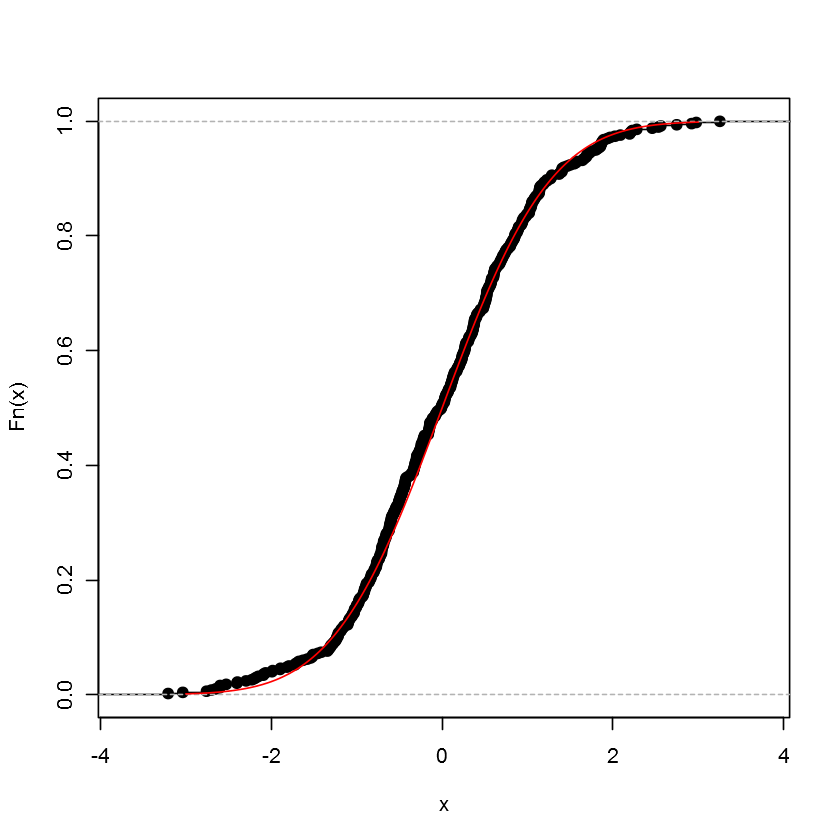

In [48]:
# Example of Monte Carlo and Boostrap Simulation 
#------------------------------------------------
 
n_obs = 500 
n_rep = 5000
x_bar<-rep(0,n_rep)
x_bbar<-rep(0,n_rep)


#Compare empirical CDF to true F=N(0,1)
#--------------------------------------
#Draw a random sample from F~N(0,1)
obs<-rnorm(n_obs,0,1)

Fn <- ecdf(obs)

plot(Fn, main="")

#Compare to true F
x<-seq(-3,3,by=0.01)
lines(x,pnorm(x), col="red")

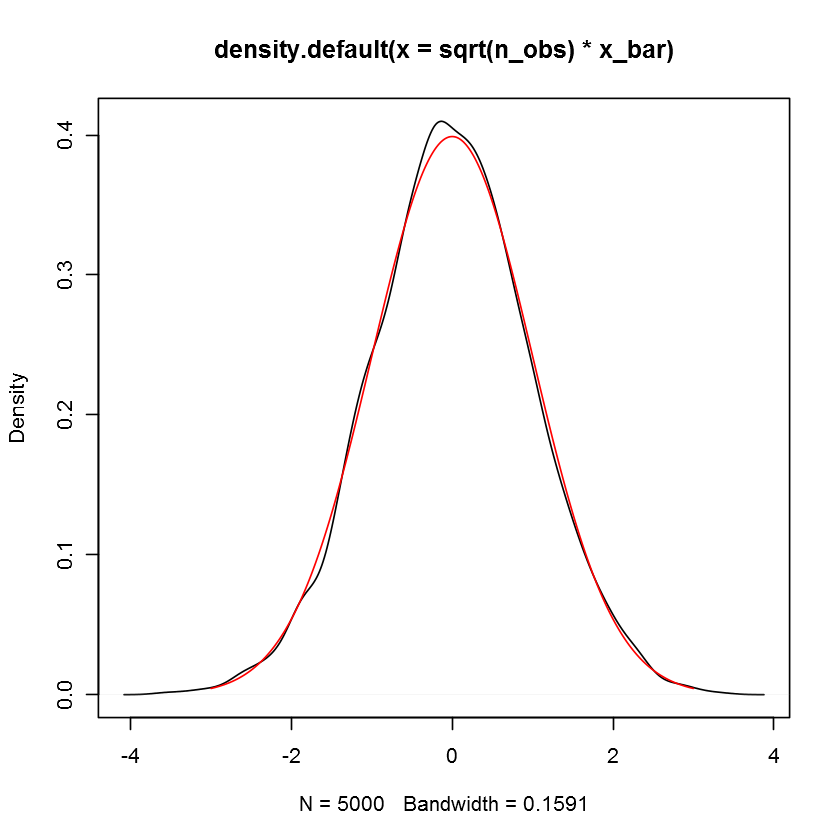

In [49]:
#Monte Carlo simulation for the sampling distribution of X_bar
#-------------------------------------------------------------

for(j in 1:n_rep){

obs<-rnorm(n_obs,0,1)
x_bar[j] = mean(obs)

}

plot(density(sqrt(n_obs)*x_bar))
lines(x,dnorm(x), col="red")


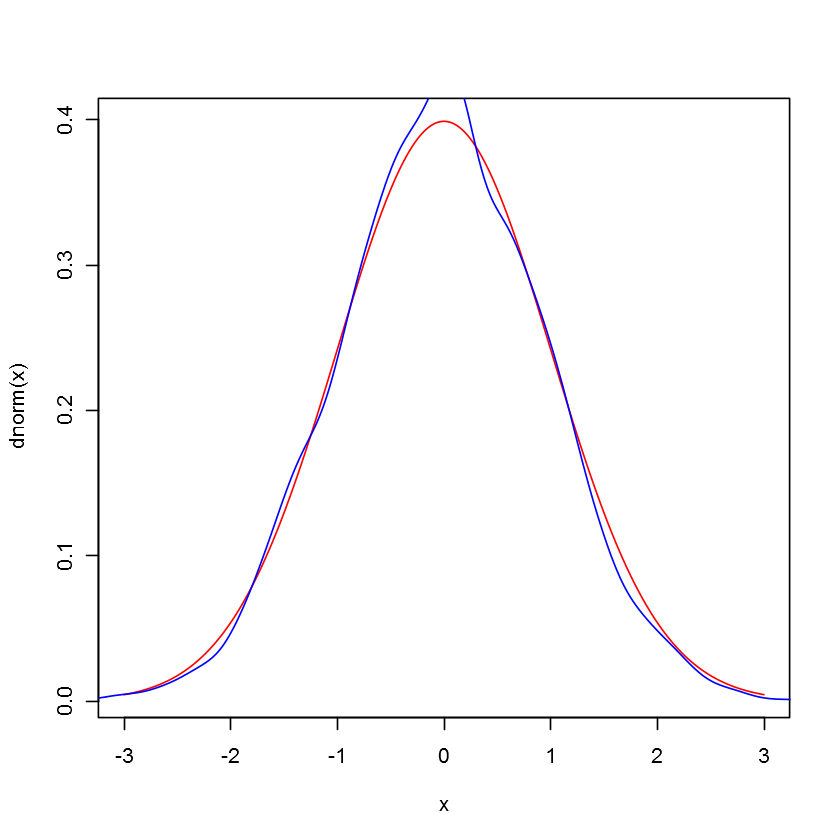

In [50]:
#Approximating the sampling distribution of X_bar using bootstrap sampling
#--------------------------------------------------------------------------

#Obtain Fn
#---------------------
obs<-rnorm(n_obs,0,1)
mu_hat<-mean(obs)

#Resampling from Fn
#-------------------
for(j in 1:n_rep){

boot_sample<-sample(obs,n_obs, replace=T)
 
x_bbar[j] = sqrt(n_obs)*( mean(boot_sample) - mu_hat)

}

plot(x,dnorm(x), col="red", type="l")
lines(density(x_bbar), col="blue")
